# Data Exploration

In [1]:
#set up
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, geom_text, theme_minimal, geom_histogram, labs
import re
pd.set_option('display.max_columns', None)

In [3]:
#load data
df = pd.read_csv('joined_data.csv').iloc[:, 1:]
df.head()

,statename,place,type,restrict_sf_permit,restrict_mf_permit,limit_sf_units,limit_mf_units,limit_mf_dwellings,limit_mf_dwelling_units,min_lot_size,open_space,inclusionary,half_acre_less,half_acre_more,one_acre_more,two_acre_more,max_den_cat1,max_den_cat2,max_den_cat3,max_den_cat4,max_den_cat5,council_nz,planning_nz,countybrd_nz,pubhlth_nz,site_plan_nz,env_rev_nz,council_rz,planning_rz,zoning_rz,countybrd_rz,countyzone_rz,townmeet_rz,env_rev_rz,total_nz,total_rz,adu,height_ft_median,height_ft_mode,height_st_median,height_st_mode,parking_median,parking_mode,mf_per,maxden5,maxden4,maxden3,maxden2,maxden1,sindex1,sindex2,sindex3,sindex4,sindex5,sindex6,sindex7,sindex8,height_st_median_sc,height_st_mode_sc,sindex9,sindex10,sindex11,sindex9_st,sindex10_st,zri,zri_st,add_index,zri_up,zri_up_st,wt_all_2019,st_wt_all_2019,wt_msa_2019,st_wt_msa_2019,Geography,Geographic Area Name_x,Estimate!!Owner-occupied housing units with a mortgage!!Owner-occupied housing units with a mortgage,"Estimate!!Less than \$50,000","Estimate!!\$50,000 to \$99,999","Estimate!!\$100,000 to \$299,999","Estimate!!\$300,000 to \$499,999","Estimate!!\$500,000 to \$749,999","Estimate!!\$750,000 to \$999,999","Estimate!!\$1,000,000 or more",Estimate!!Median (dollars),Estimate!!MORTGAGE STATUS!!With a mortgage and either a second mortgage or home equity loan,Estimate!!MORTGAGE STATUS!!With a mortgage and either a second mortgage or home equity loan!!Only Second mortgage,Estimate!!MORTGAGE STATUS!!With a mortgage and either a second mortgage or home equity loan!!Only Home equity loan,Estimate!!MORTGAGE STATUS!!With a mortgage and either a second mortgage or home equity loan!!Both second mortgage and home equity loan,Estimate!!MORTGAGE STATUS!!No second mortgage and no home equity loan,Estimate!!MORTGAGE STATUS!!Home equity loan without a primary mortgage,"Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Less than \$10,000","Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!\$10,000 to \$24,999","Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!\$25,000 to \$34,999","Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!\$35,000 to \$49,999","Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!\$50,000 to \$74,999","Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!\$75,000 to \$99,999","Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!\$100,000 to \$149,999","Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!\$150,000 or more",Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2022 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Estimate!!RATIO OF VALUE TO HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than 2.0,Estimate!!RATIO OF VALUE TO HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!2.0 to 2.9,Estimate!!RATIO OF VALUE TO HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!3.0 to 3.9,Estimate!!RATIO OF VALUE TO HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!4.0 or more,Estimate!!RATIO OF VALUE TO HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Not computed,Estimate!!MONTHLY HOUSING COSTS!!Less than \$200,Estimate!!MONTHLY HOUSING COSTS!!\$200 to \$399,Estimate!!MONTHLY HOUSING COSTS!!\$400 to \$599,Estimate!!MONTHLY HOUSING COSTS!!\$600 to \$799,Estimate!!MONTHLY HOUSING COSTS!!\$800 to \$999,"Estimate!!MONTHLY HOUSING COSTS!!\$1,000 to \$1,499","Estimate!!MONTHLY HOUSING COSTS!!\$1,500 to \$1,999","Estimate!!MONTHLY HOUSING COSTS!!\$2,000 to \$2,499","Estimate!!MONTHLY HOUSING COSTS!!\$2,500 to \$2,999","Estimate!!MONTHLY HOUSING COSTS!!\$3,000 or more",Estimate!!MONTHLY HOUSING COSTS!!Median (dollars),"Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Less than \$20,000","Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MO

#### Create Density Bins

In [6]:
df['density'].describe()

count     2210.000000
mean      1000.173122
std       1063.012447
min          2.200000
25%        449.700000
50%        721.600000
75%       1254.500000
max      20177.400000
Name: density, dtype: float64

In [8]:
bins = [0, 500, 1000, 1500, 2000, 21000]

# Create bin labels
labels = ['0-500', '500-1000', '1000-1500', '1500-2000', '2000+']

# Use pd.cut to create bins
df['density_bin'] = pd.cut(df['density'], bins=bins, labels=labels, right=False)


#### Plot Distribution of city densities

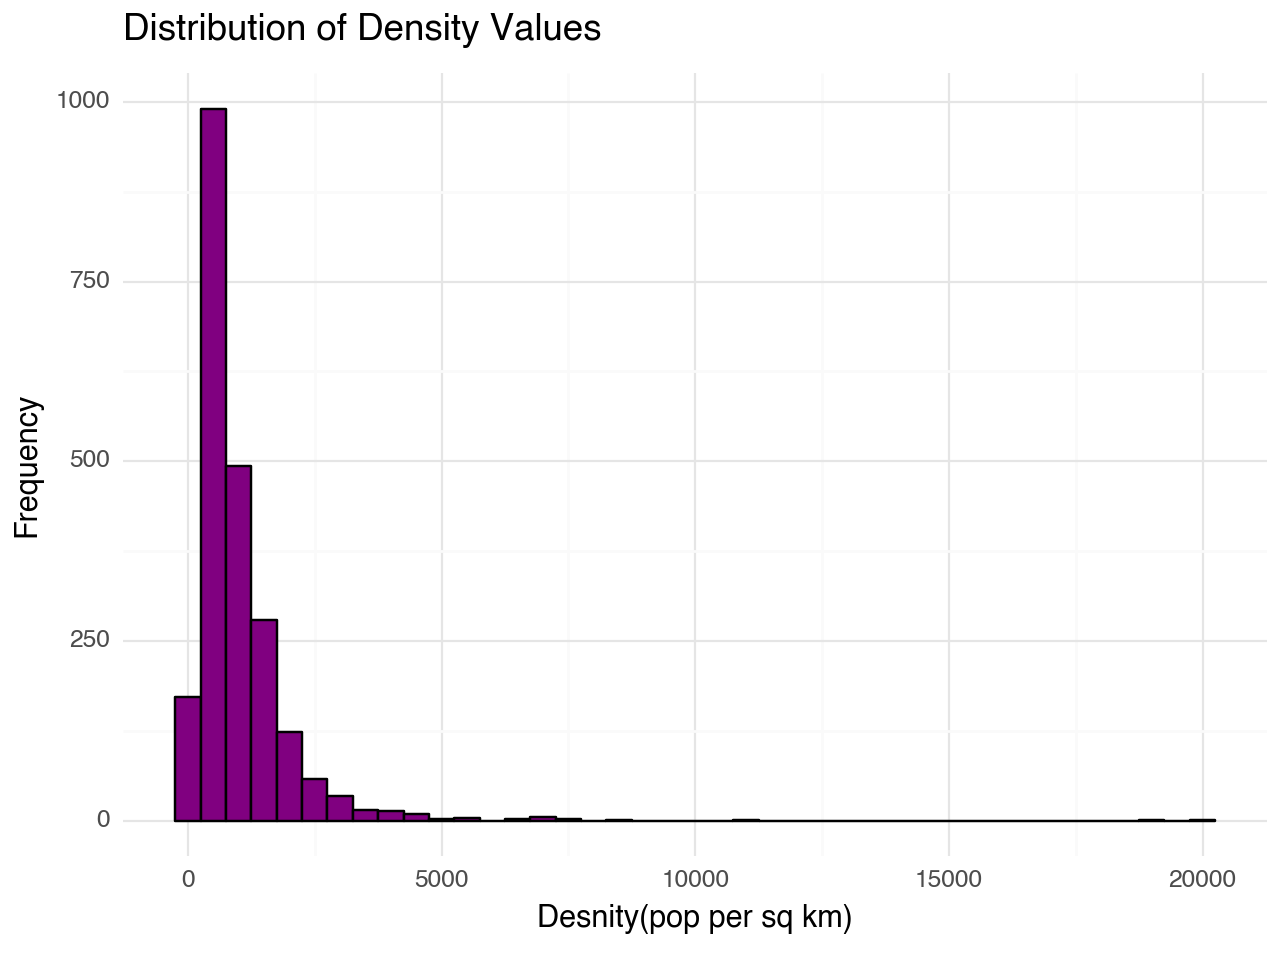

<Figure Size: (640 x 480)>

In [11]:
(ggplot(df[df['density'].notna()], aes(x='density')) +
        geom_histogram(binwidth=500, fill='purple', color='black') +  # Create histogram
        labs(title='Distribution of Density Values', 
             x='Desnity(pop per sq km)', 
             y='Frequency') +  
        theme_minimal())  

#### Plot Distribution of Zoning Restrictiveness Index

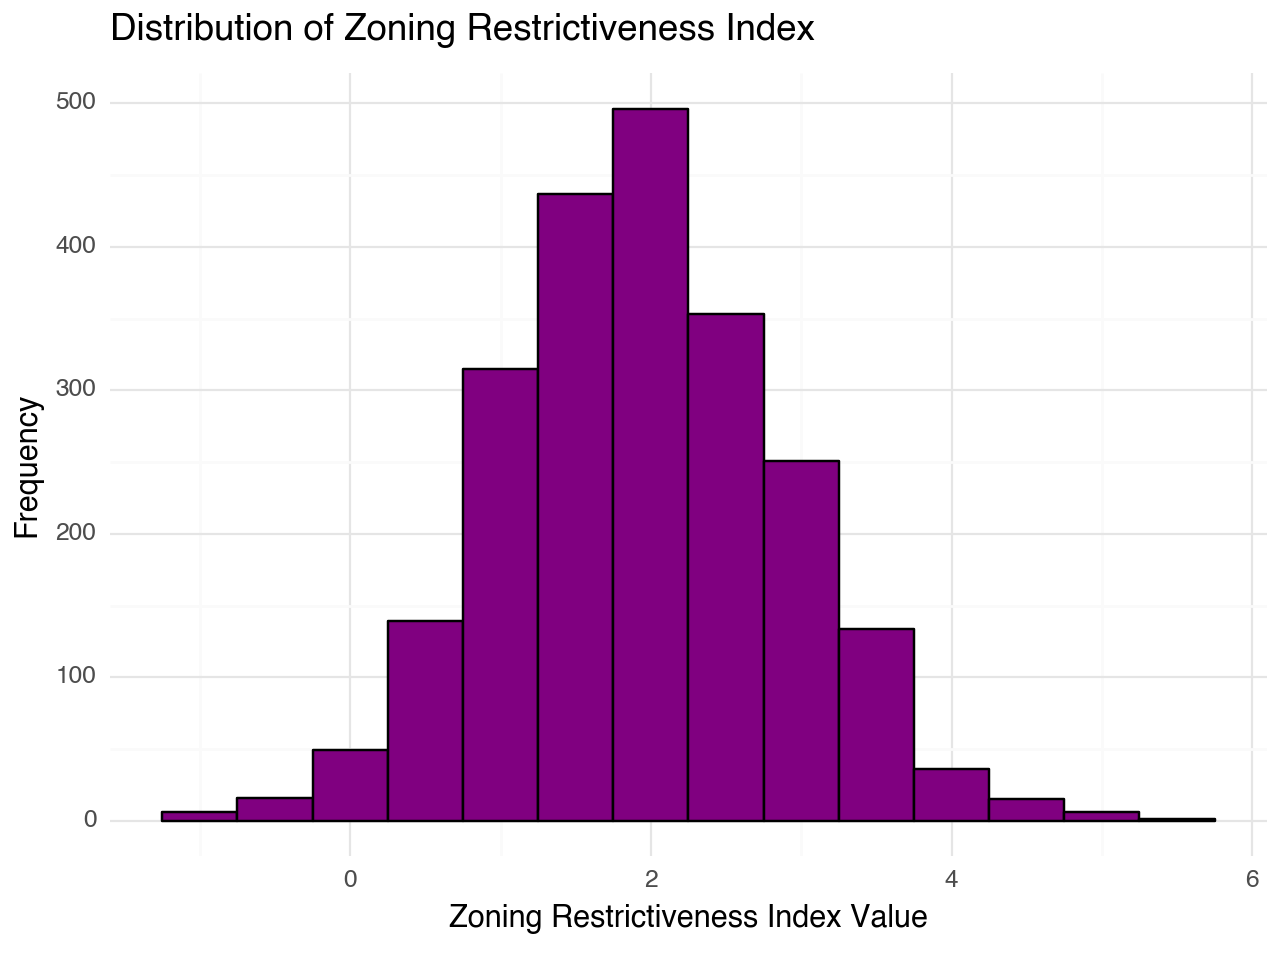

<Figure Size: (640 x 480)>

In [13]:
(ggplot(df, aes(x='zri')) +
        geom_histogram(binwidth=0.5, fill='purple', color='black') +  # Create histogram
        labs(title='Distribution of Zoning Restrictiveness Index', 
             x='Zoning Restrictiveness Index Value', 
             y='Frequency') +  # Add title and axis labels
        theme_minimal())  # Optional: clean theme

#### Plot Frequeny of Median Rent

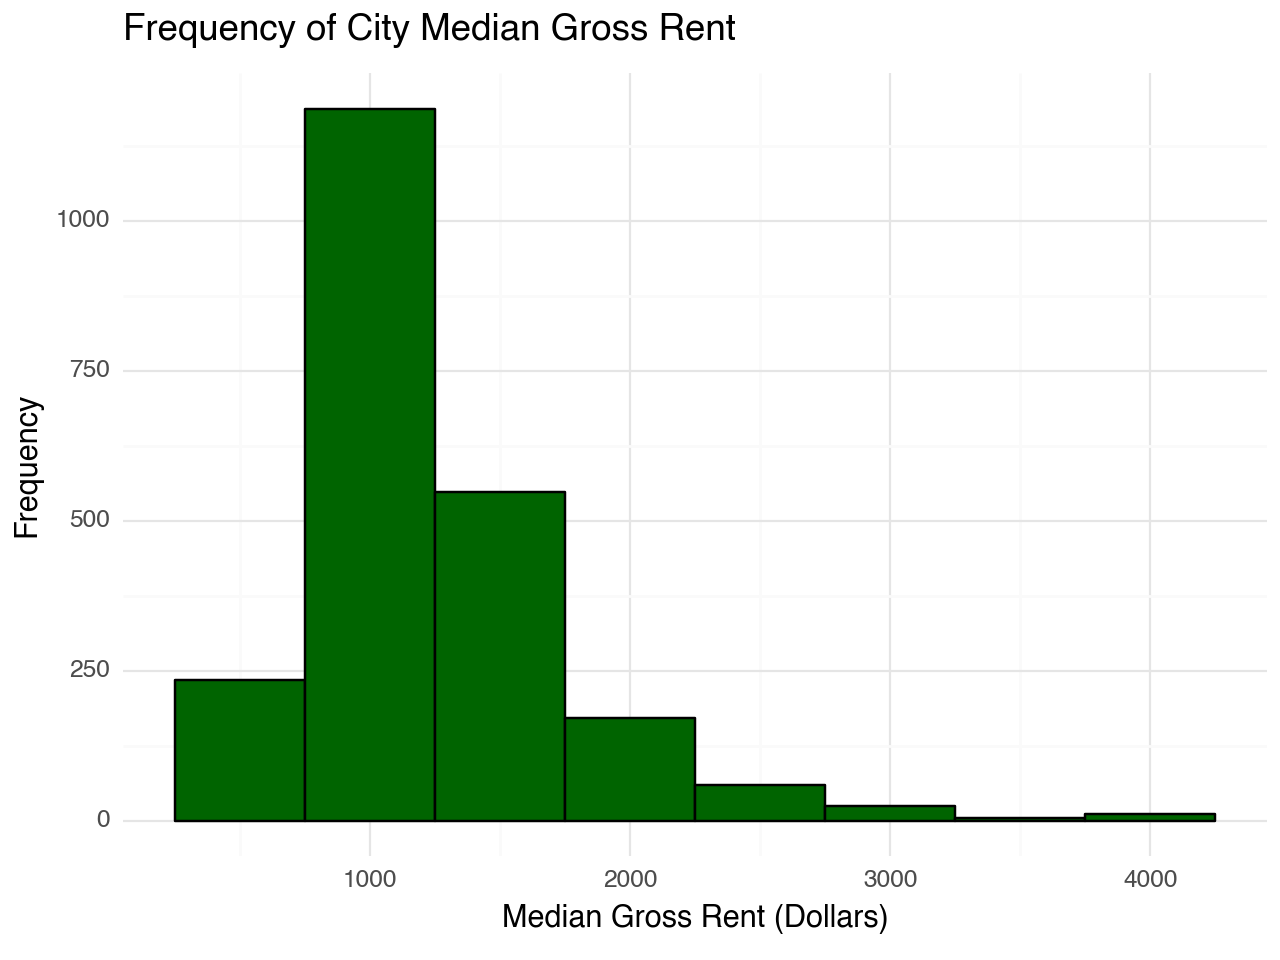

<Figure Size: (640 x 480)>

In [15]:
(ggplot(df[df['Median Gross Rent Total'].notna()], aes(x='Median Gross Rent Total')) +
        geom_histogram(binwidth=500, fill='darkgreen', color='black') +  # Create histogram
        labs(title='Frequency of City Median Gross Rent', 
             x='Median Gross Rent (Dollars)', 
             y='Frequency') +  # Add title and axis labels
        theme_minimal())  # Optional: clean theme

#### Plot Relationship Between Zoning Restrictiveness, Median Rent, and Density 

In [26]:
#Only include data where density is available
dense = df[df['density_bin'].notna()]

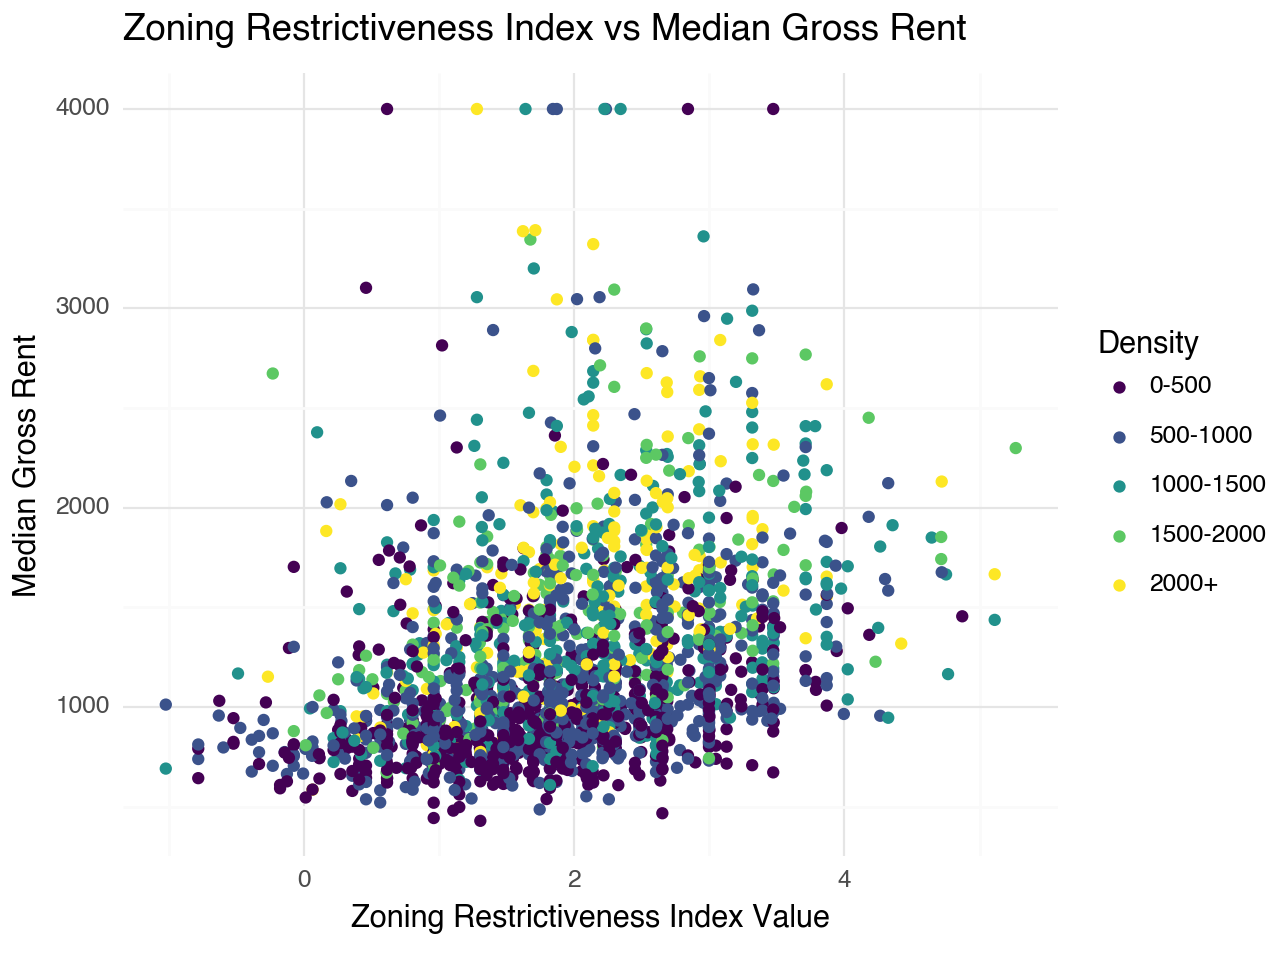

<Figure Size: (640 x 480)>

In [28]:
(ggplot(dense[dense['Median Gross Rent Total'].notna()], aes(x='zri', y='Median Gross Rent Total')) +
        geom_point(aes(color='density_bin')) +
 labs(title='Zoning Restrictiveness Index vs Median Gross Rent', 
             x='Zoning Restrictiveness Index Value', 
             y='Median Gross Rent', 
     color = 'Density') +  # Add title and axis labels
        #geom_text(aes(label='statename'), nudge_y=0.5) +  # Adds state labels
        theme_minimal())  # Optional, for a clean theme